<a href="https://colab.research.google.com/github/faisu6339-glitch/ML-Projects-/blob/main/P_2_Black_Friday_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(
    'BlackFriday.csv',
    engine='python',      # more flexible parser
    on_bad_lines='skip'   # ignore bad rows
)

print(df.shape)
df.head()


(46169, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46169 entries, 0 to 46168
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     46169 non-null  int64  
 1   Product_ID                  46168 non-null  object 
 2   Gender                      46168 non-null  object 
 3   Age                         46168 non-null  object 
 4   Occupation                  46168 non-null  float64
 5   City_Category               46168 non-null  object 
 6   Stay_In_Current_City_Years  46168 non-null  object 
 7   Marital_Status              46168 non-null  float64
 8   Product_Category_1          46168 non-null  float64
 9   Product_Category_2          31700 non-null  float64
 10  Product_Category_3          14059 non-null  float64
 11  Purchase                    46168 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 4.2+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,4.616900e+04,46168.000000,46168.000000,46168.000000,31700.000000,14059.000000,46168.000000
mean,1.002629e+06,8.119737,0.408291,5.295984,9.873312,12.709652,9293.693056
std,5.010924e+03,6.573567,0.491523,3.714001,5.066887,4.118227,4948.889426
min,1.000000e+01,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.000939e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5867.000000
50%,1.002462e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8050.000000
75%,1.004232e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12035.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23958.000000


In [ ]:
df.shape


(46169, 12)

In [ ]:
df.isnull()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
46164,False,False,False,False,False,False,False,False,False,True,True,False
46165,False,False,False,False,False,False,False,False,False,False,True,False
46166,False,False,False,False,False,False,False,False,False,False,True,False
46167,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
df.isnull().sum()


,0
User_ID,0
Product_ID,1
Gender,1
Age,1
Occupation,1
City_Category,1
Stay_In_Current_City_Years,1
Marital_Status,1
Product_Category_1,1
Product_Category_2,14469


✔️ 2. Product_ID — 1 missing

In [ ]:
df['Product_ID'].fillna(df['Product_ID'].mode()[0], inplace=True)


/tmp/ipython-input-3825244985.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product_ID'].fillna(df['Product_ID'].mode()[0], inplace=True)


✔️ 3. Gender — 3 missing

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


/tmp/ipython-input-700870124.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


✔️ 4. Age — 3 missing

In [ ]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True)


/tmp/ipython-input-2527673359.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mode()[0], inplace=True)


✔️ 5. Occupation — 2 missing

In [ ]:
df['Occupation'].fillna(df['Occupation'].mode()[0], inplace=True)


/tmp/ipython-input-1793765776.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Occupation'].fillna(df['Occupation'].mode()[0], inplace=True)


✔️ 6. City_Category — 4 missing

In [ ]:
df['City_Category'].fillna(df['City_Category'].mode()[0], inplace=True)


/tmp/ipython-input-96126794.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['City_Category'].fillna(df['City_Category'].mode()[0], inplace=True)


✔️ 7. Stay_In_Current_City_Years — 5 missing

In [ ]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].fillna(df['Stay_In_Current_City_Years'].mode()[0])


✔️ 8. Marital_Status — 4 missing

In [ ]:
df['Marital_Status'] = df['Marital_Status'].fillna(df['Marital_Status'].mode()[0])


⚠️ 9. Product_Category_1 — 7 missing

Product_Category 2 and 3 have many null values so remove them is better approach

In [ ]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(0)
df['Product_Category_3'] = df['Product_Category_3'].fillna(0)
df['Product_Category_1'] = df['Product_Category_1'].fillna(0)



In [ ]:
df = df.dropna(subset=['Purchase'])


In [ ]:
df.isnull().sum()


,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0


In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,0.0,0.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,0.0,0.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,0.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,0.0,0.0,7969.0


In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

✔️ Unique gender categories

In [ ]:
df['Gender'].unique()


array(['F', 'M'], dtype=object)

In [ ]:
df['Gender'].value_counts()


,count
Gender,
M,34928
F,11240


In [ ]:
df['Gender'].nunique()


2

In [ ]:
df['User_ID'].unique()


array([1000001, 1000002, 1000003, ..., 1001080, 1001085, 1001095])

In [ ]:
df['User_ID'].value_counts()

,count
User_ID,
1000889,137
1000424,108
1001015,101
1001088,98
1000869,96
...,...
1000907,1
1000874,1
1000831,1


In [ ]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
df['Age'].value_counts()

,count
Age,
26-35,18258
36-45,9103
18-25,8791
46-50,3750
51-55,3246
55+,1790
0-17,1230


In [ ]:
df['Marital_Status'].unique()

array([0., 1.])

In [ ]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
0.0,27318
1.0,18850


In [ ]:
df['Product_ID'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00290142',
       'P00159342', 'P00076242'], dtype=object)

In [ ]:
df['Product_ID'].nunique()

3058

In [ ]:
df['Occupation'].unique()

array([10., 16., 15.,  7., 20.,  9.,  1., 12., 17.,  0.,  3.,  4., 11.,
        8., 19.,  2., 18.,  5., 14., 13.,  6.])

In [ ]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
df['Purchase'].sum()

np.float64(429071221.0)

Columns

In [ ]:
for column in df.columns:
    print(column, df[column].nunique())

User_ID 5391
Product_ID 3058
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category_1 18
Product_Category_2 18
Product_Category_3 16
Purchase 11472


In [ ]:
len(df[df['Gender']=="M"]),len(df[df['Gender']=="F"])

(34928, 11240)

In [ ]:
df[df['Gender']=="M"]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,0.0,0.0,7969.0
5,1000003,P00193542,M,26-35,15.0,A,3,0.0,1.0,2.0,0.0,15227.0
6,1000004,P00184942,M,46-50,7.0,B,2,1.0,1.0,8.0,17.0,19215.0
7,1000004,P00346142,M,46-50,7.0,B,2,1.0,1.0,15.0,0.0,15854.0
8,1000004,P0097242,M,46-50,7.0,B,2,1.0,1.0,16.0,0.0,15686.0
...,...,...,...,...,...,...,...,...,...,...,...,...
46163,1001120,P00087242,M,18-25,4.0,A,0,1.0,14.0,0.0,0.0,11505.0
46164,1001120,P00220642,M,18-25,4.0,A,0,1.0,8.0,0.0,0.0,9924.0
46165,1001120,P00052142,M,18-25,4.0,A,0,1.0,8.0,14.0,0.0,7781.0
46166,1001120,P00268442,M,18-25,4.0,A,0,1.0,8.0,17.0,0.0,10044.0


Check outliers in Purchase

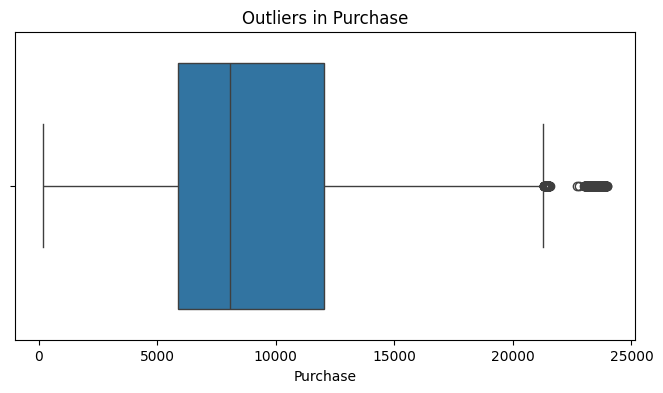

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.boxplot(x=df['Purchase'])
plt.title("Outliers in Purchase")
plt.show()


✔️ 2. Boxplot for Multiple Columns

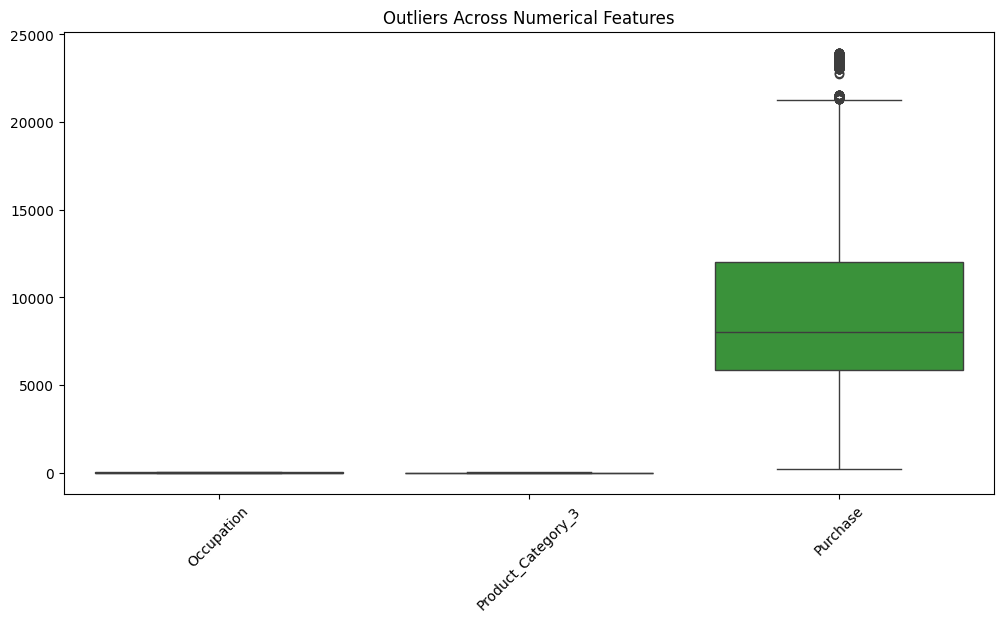

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Occupation', 'Age', 'Gender', 'Product_Category_3', 'Purchase']])
plt.xticks(rotation=45)
plt.title("Outliers Across Numerical Features")
plt.show()


✔️ 3. Use IQR (Statistical detection)

In [ ]:
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Purchase'] < lower_bound) | (df['Purchase'] > upper_bound)]
print(outliers.shape)


(225, 12)


✔️ 4. Histogram (Check distribution)

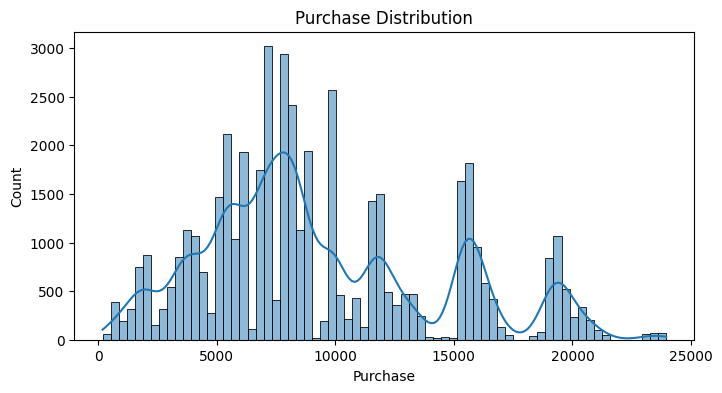

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['Purchase'], kde=True)
plt.title("Purchase Distribution")
plt.show()


🧠 Step 1 — Detect Outliers using IQR

In [ ]:
import numpy as np
numeric_cols=df.select_dtypes(include=np.number).columns
numeric_cols

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

🚀 Step 2 — Function to detect outliers for a column

In [ ]:
def detect_outliers_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower) | (df[column] > upper)]
    print(f"{column}: {outliers.shape[0]} outliers")


In [ ]:
detect_outliers_IQR(df, 'Purchase')


Purchase: 225 outliers


🧨 Step 3 — Detect outliers for ALL numerical features at once

In [ ]:
for col in numeric_cols:
    detect_outliers_IQR(df, col)


User_ID: 0 outliers
Occupation: 0 outliers
Marital_Status: 0 outliers
Product_Category_1: 0 outliers
Product_Category_2: 0 outliers
Product_Category_3: 0 outliers
Purchase: 225 outliers


🛠 Step 4 — Remove Outliers (IQR Method)

In [ ]:
def remove_outliers_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return df[(df[column] >= lower) & (df[column] <= upper)]


🔥 Step 5 — Remove Outliers for Multiple Columns Automatically

In [ ]:
def remove_multiple_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower) & (df[col] <= upper)]

    return df


🖼️ Step 6 — Visualize Before/After Removal

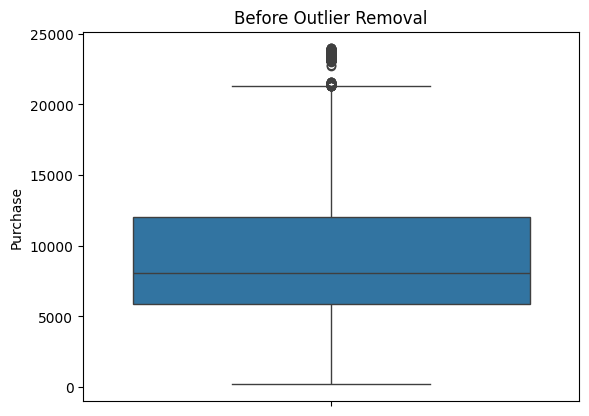

In [ ]:
sns.boxplot(df['Purchase'])
plt.title("Before Outlier Removal")
plt.show()


In [ ]:
df_clean = remove_multiple_outliers(df.copy(), ['Purchase', 'Product_Category_1'])


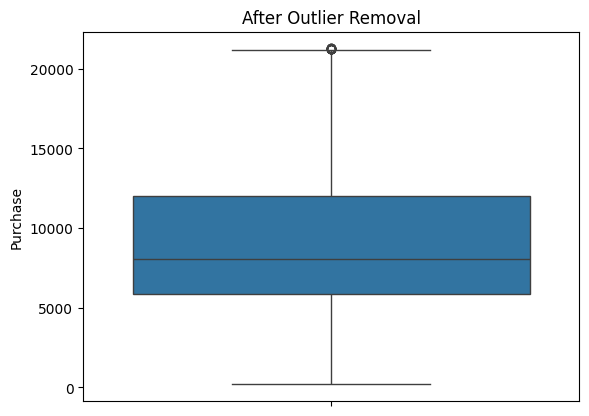

In [ ]:
sns.boxplot(df_clean['Purchase'])
plt.title("After Outlier Removal")
plt.show()


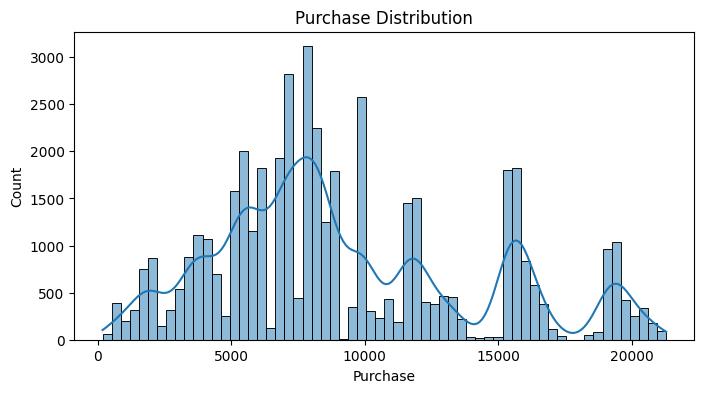

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df_clean['Purchase'], kde=True)
plt.title("Purchase Distribution")
plt.show()


In [ ]:
df['Purchase'].describe()

,Purchase
count,46168.000000
mean,9293.693056
std,4948.889426
min,185.000000
25%,5867.000000
50%,8050.000000
75%,12035.000000
max,23958.000000


In [ ]:
df_clean['Purchase'].describe()


,Purchase
count,45943.000000
mean,9225.763032
std,4864.315132
min,185.000000
25%,5858.500000
50%,8043.000000
75%,11999.000000
max,21287.000000


In [ ]:
detect_outliers_IQR(df_clean, 'Purchase')


Purchase: 17 outliers


In [ ]:
df.shape


(46168, 12)

In [ ]:
df_clean.shape


(45943, 12)

In [ ]:
df['Purchase'].min(), df['Purchase'].max()


(185.0, 23958.0)

In [ ]:
df_clean['Purchase'].min(), df_clean['Purchase'].max()


(185.0, 21287.0)

✅ Pie Chart of Gender Distribution

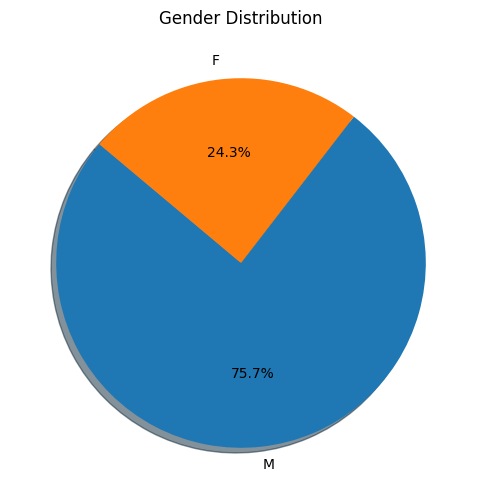

In [ ]:
import matplotlib.pyplot as plt

gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    shadow=True
)

plt.title("Gender Distribution")
plt.show()


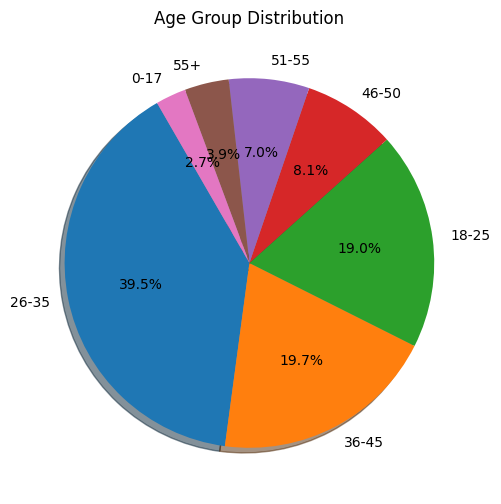

In [ ]:
import matplotlib.pyplot as plt

age_counts = df['Age'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    age_counts,
    labels=age_counts.index,
    autopct='%1.1f%%',
    startangle=120,
    shadow=True
)
plt.title("Age Group Distribution")
plt.show()


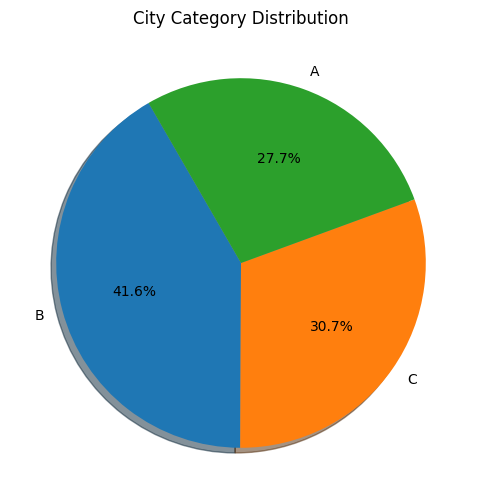

In [ ]:
city_counts = df['City_Category'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    city_counts,
    labels=city_counts.index,
    autopct='%1.1f%%',
    startangle=120,
    shadow=True
)
plt.title("City Category Distribution")
plt.show()


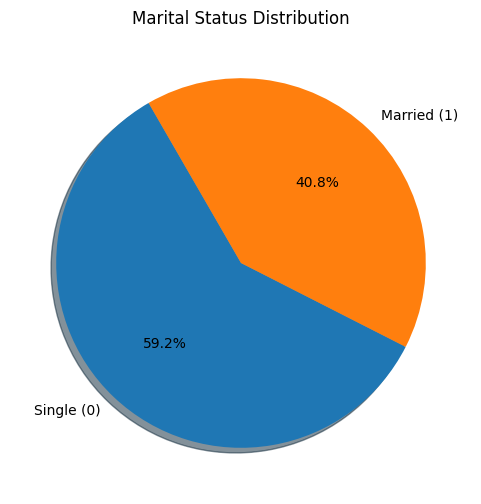

In [ ]:
marital_counts = df['Marital_Status'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    marital_counts,
    labels=['Single (0)', 'Married (1)'],
    autopct='%1.1f%%',
    startangle=120,
    shadow=True
)
plt.title("Marital Status Distribution")
plt.show()


✅ 1. Relationship Between Two Categorical Variables

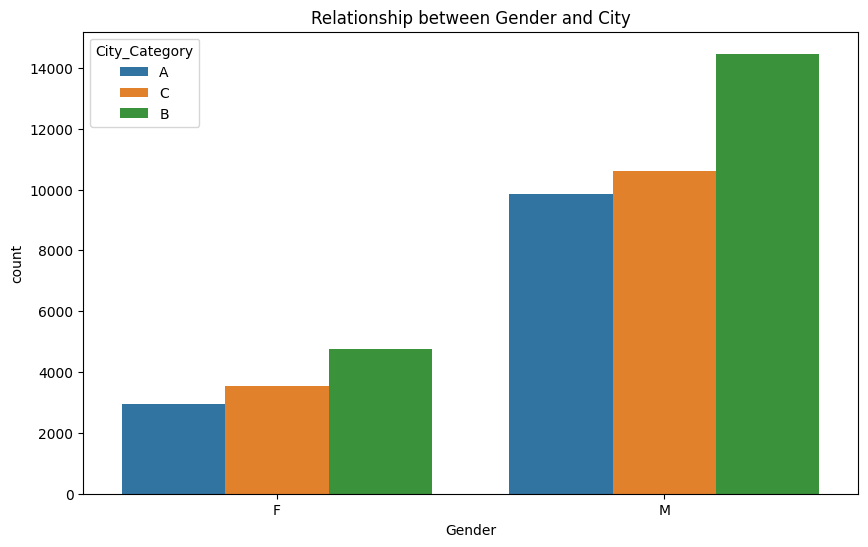

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='City_Category', data=df)
plt.title('Relationship between Gender and City')
plt.show()

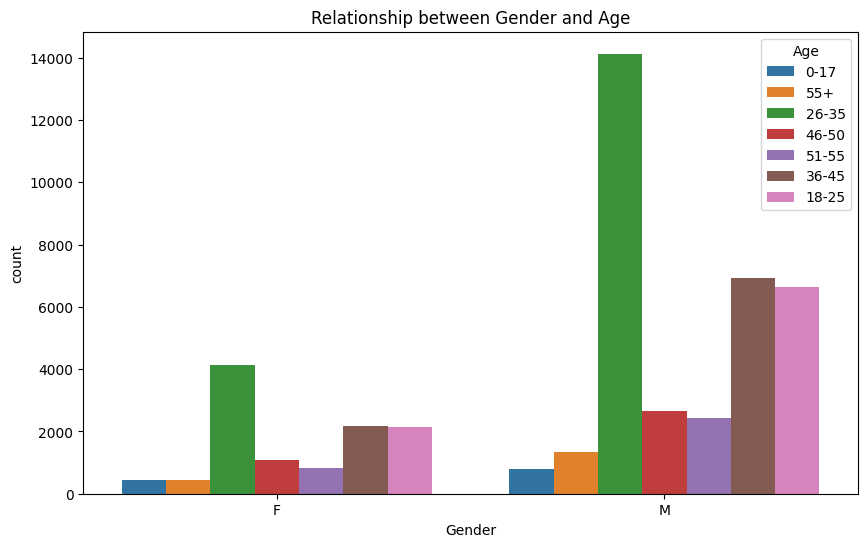

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Age', data=df)
plt.title('Relationship between Gender and Age')
plt.show()

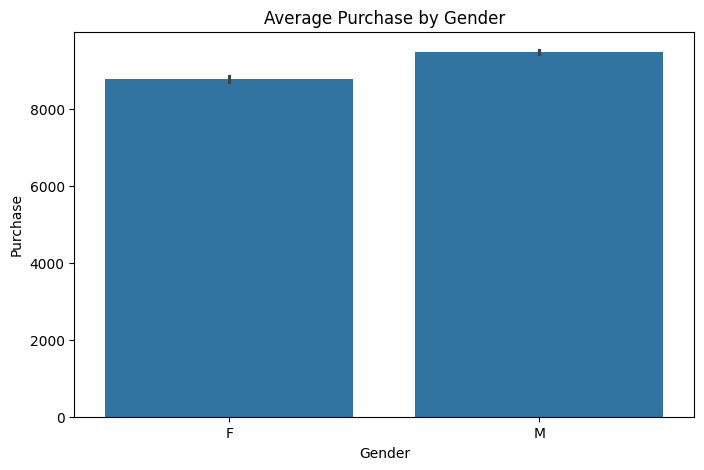

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Gender', y='Purchase')
plt.title("Average Purchase by Gender")
plt.show()


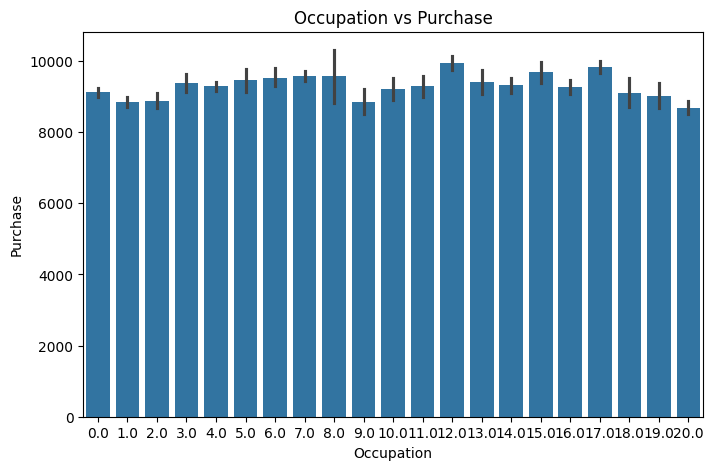

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Occupation', y='Purchase')
plt.title("Occupation vs Purchase")
plt.show()


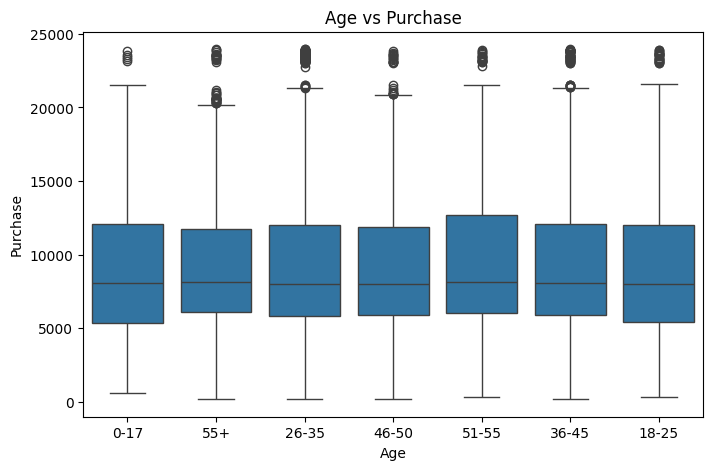

In [ ]:
col1 = 'Age'
col2 = 'Purchase'

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x=col1, y=col2)
plt.title(f"{col1} vs {col2}")
plt.show()
